<a href="https://colab.research.google.com/github/uumair327/deep_learning/blob/main/DL03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To design and implement a Neural Network using Keras API.


a) To design a Neural Network using Keras api.

 b)To plot the model and its subsequent layers(along with the input and output dimensions of each layer) using vis_utils.

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [10]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
# Normalize the data (scaling pixel values to range [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 1D vector
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Define batch size and epochs
batch_size = 64  # Number of samples per batch
epochs = 10      # Number of epochs

In [16]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8582 - loss: 0.5055 - val_accuracy: 0.9538 - val_loss: 0.1591
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9576 - loss: 0.1472 - val_accuracy: 0.9656 - val_loss: 0.1169
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9720 - loss: 0.0990 - val_accuracy: 0.9696 - val_loss: 0.0965
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9789 - loss: 0.0732 - val_accuracy: 0.9711 - val_loss: 0.0896
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9824 - loss: 0.0576 - val_accuracy: 0.9740 - val_loss: 0.0794
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9869 - loss: 0.0438 - val_accuracy: 0.9774 - val_loss: 0.0723
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9903 - loss: 0.0358 - val_accuracy: 0.9756 - val_loss: 0.0805
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9915 - loss: 0.0287 - val_accuracy:

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 0s - 1ms/step - accuracy: 0.9773 - loss: 0.0780
Test accuracy: 0.9772999882698059


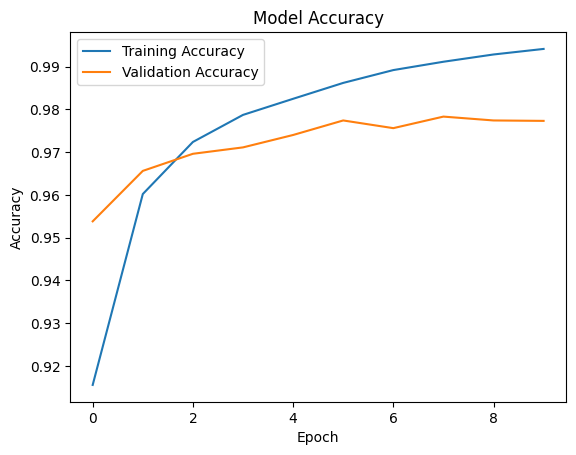

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

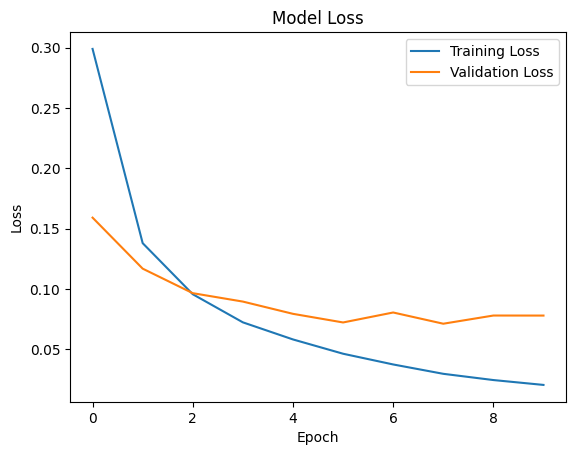

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")


313/313 - 1s - 2ms/step - accuracy: 0.9773 - loss: 0.0780
Test Accuracy: 0.9772999882698059


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


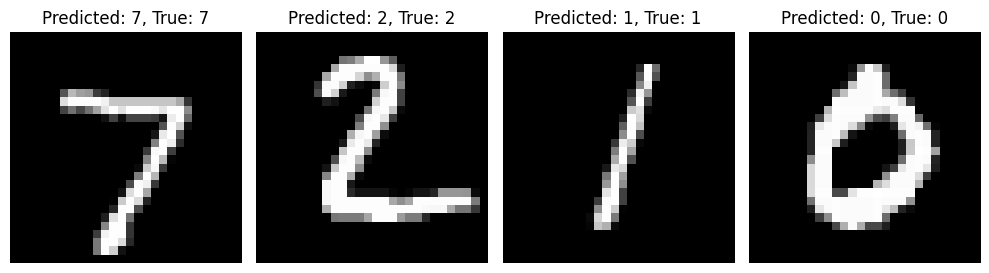

In [21]:
import numpy as np

predictions = model.predict(X_test)
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
